# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [3]:
dataset = {
    
    "k": [[1,2],[2,3],[3,1]],
    "r": [[6,5],[7,7],[8,6]]
    
}

new_point = [5,7]

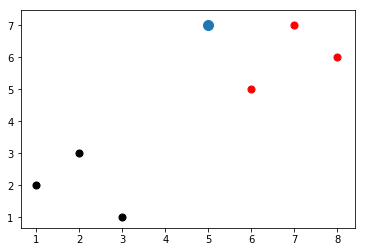

In [10]:
[[plt.scatter(ii[0], ii[1], s=50, c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

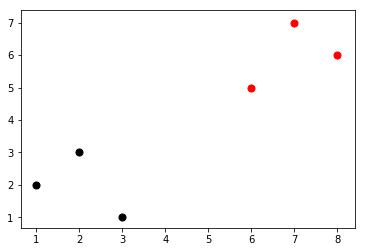

In [19]:
for i in dataset:
    for punto in dataset[i]:
        plt.scatter(punto[0], punto[1], s=50, c=i)

In [52]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("K es un valor mejor que el número de elementos a votar!!")
        
    distances = []
    
    #Para cada grupo en el dataset
    for group in data:
        #Para cada punto en cada grupo
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature)-np.array(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict)) #Calcula la norma, el módulo del vector
            distances.append([d, group])
    
    if verbose:
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]] #sorted ordena de menor a mayor
                                                  #por la primera columna, y sacamos los k vecinos más cercanos
    if verbose:
        print(votes)
    
    #Saca el valor más repetido en los votos
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    return  vote_result[0][0] #[("r",2), ("k",1)]

result = k_nearest_neighbors(dataset, new_point)
result

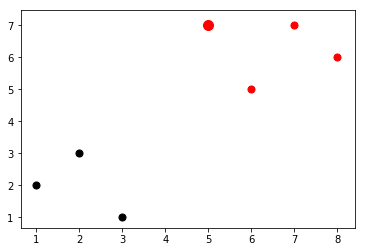

In [28]:
[[plt.scatter(ii[0], ii[1], s=50, c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

[[3.905124837953327, 'k'], [2.5, 'k'], [3.640054944640259, 'k'], [2.0615528128088303, 'r'], [3.905124837953327, 'r'], [4.272001872658765, 'r']]
['r', 'k', 'k']
[('k', 2)]
k


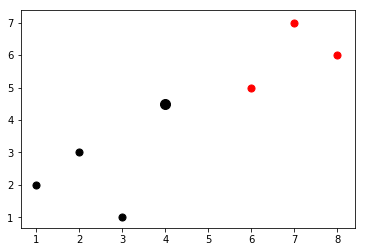

In [31]:
new_point=[4,4.5]
result = k_nearest_neighbors(dataset, new_point)
print(result)

[[plt.scatter(ii[0], ii[1], s=50, c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

# Apliando nuestro KNN al dataset del Cancer

In [33]:
import pandas as pd

In [35]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.replace("?", -99999, inplace=True)
df.columns=["name","V1","V2","V3","V4","V5","V6","V7","V8","V9","class"]
df.head()

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
df.drop(["name"], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [37]:
full_data = df.astype(float).values.tolist()
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [38]:
import random

In [39]:
random.shuffle(full_data)

In [40]:
test_size = 0.2

train_set = {
    2: [],
    4: []
}

test_set = {
    2: [],
    4: []
}

In [43]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [46]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [48]:
train_set

{2: [[1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 5.0, 3.0, 2.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 2.0, 1.0, 3.0, -99999.0, 1.0, 1.0, 1.0],
  [3.0, 4.0, 5.0, 3.0, 7.0, 3.0, 4.0, 6.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 3.0, 1.0, 1.0, 2.0, 1.0, 4.0, 8.0, 1.0],
  [4.0, 1.0,

In [55]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total += 1
        
print("Eficacia del KNN = {:.3f}".format(correct/total))

Eficacia del KNN = 0.971
